<a href="https://colab.research.google.com/github/MareMaltese/algoritmos-optimizacion/blob/main/Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Maria del Mar Maltese Giron <br>
Link: https://colab.research.google.com/drive/1law957PBcwDxACYkuFdjTpCSBqM8BlYk?usp=sharing <br>
Github: https://github.com/MareMaltese/algoritmos-optimizacion/
<br>




In [5]:
import math
import numpy as np
import itertools


##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

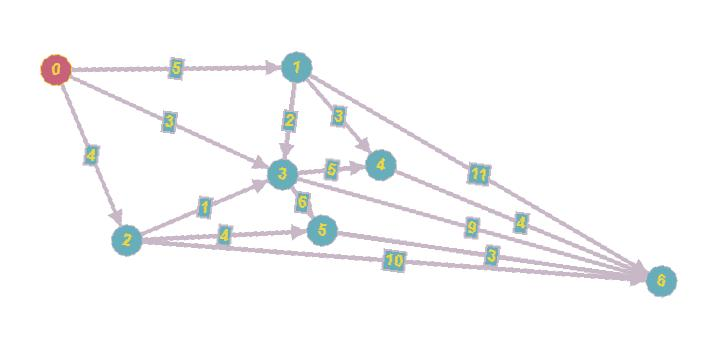

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [6]:
#Viaje por el rio - Programación dinámica
################################################################################

inalcanzable = float("inf")
TARIFAS = [
[0,5,4,3,inalcanzable,inalcanzable,inalcanzable],   #desde nodo 0
[inalcanzable,0,inalcanzable,2,3,inalcanzable,11],  #desde nodo 1
[inalcanzable,inalcanzable, 0,1,inalcanzable,4,10], #desde nodo 2
[inalcanzable,inalcanzable,inalcanzable, 0,5,6,9],
[inalcanzable,inalcanzable, inalcanzable,inalcanzable,0,inalcanzable,4],
[inalcanzable,inalcanzable, inalcanzable,inalcanzable,inalcanzable,0,3],
[inalcanzable,inalcanzable,inalcanzable,inalcanzable,inalcanzable,inalcanzable,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [7]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [8]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, inf, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, inf, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [9]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por :")
print(calcular_ruta(RUTA, 0,6) )
print("Con valor" , PRECIOS[0][6])



La ruta pasa por :
0,2,5
Con valor 11


##Problema de Asignacion de tarea
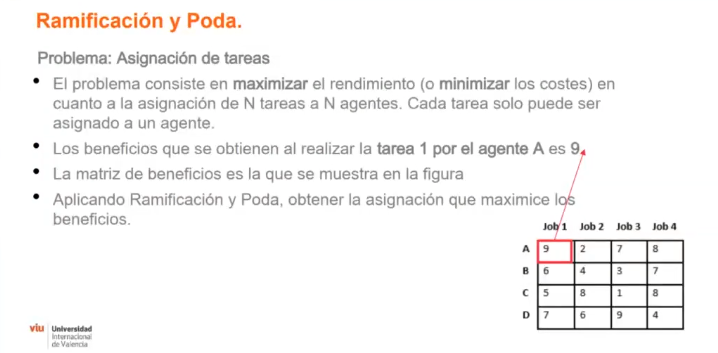

In [10]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [11]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    # print(f"COSTES[{S[i]}][{i}]={COSTES[S[i]][i]} >> {VALOR}+{COSTES[S[i]][i]} = {VALOR+COSTES[S[i]][i]}")  # Depuración
    VALOR += COSTES[S[i]][i]
  return VALOR

valor((0, 1, 2, 3  ),COSTES)

73

In [12]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [13]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [14]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [15]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


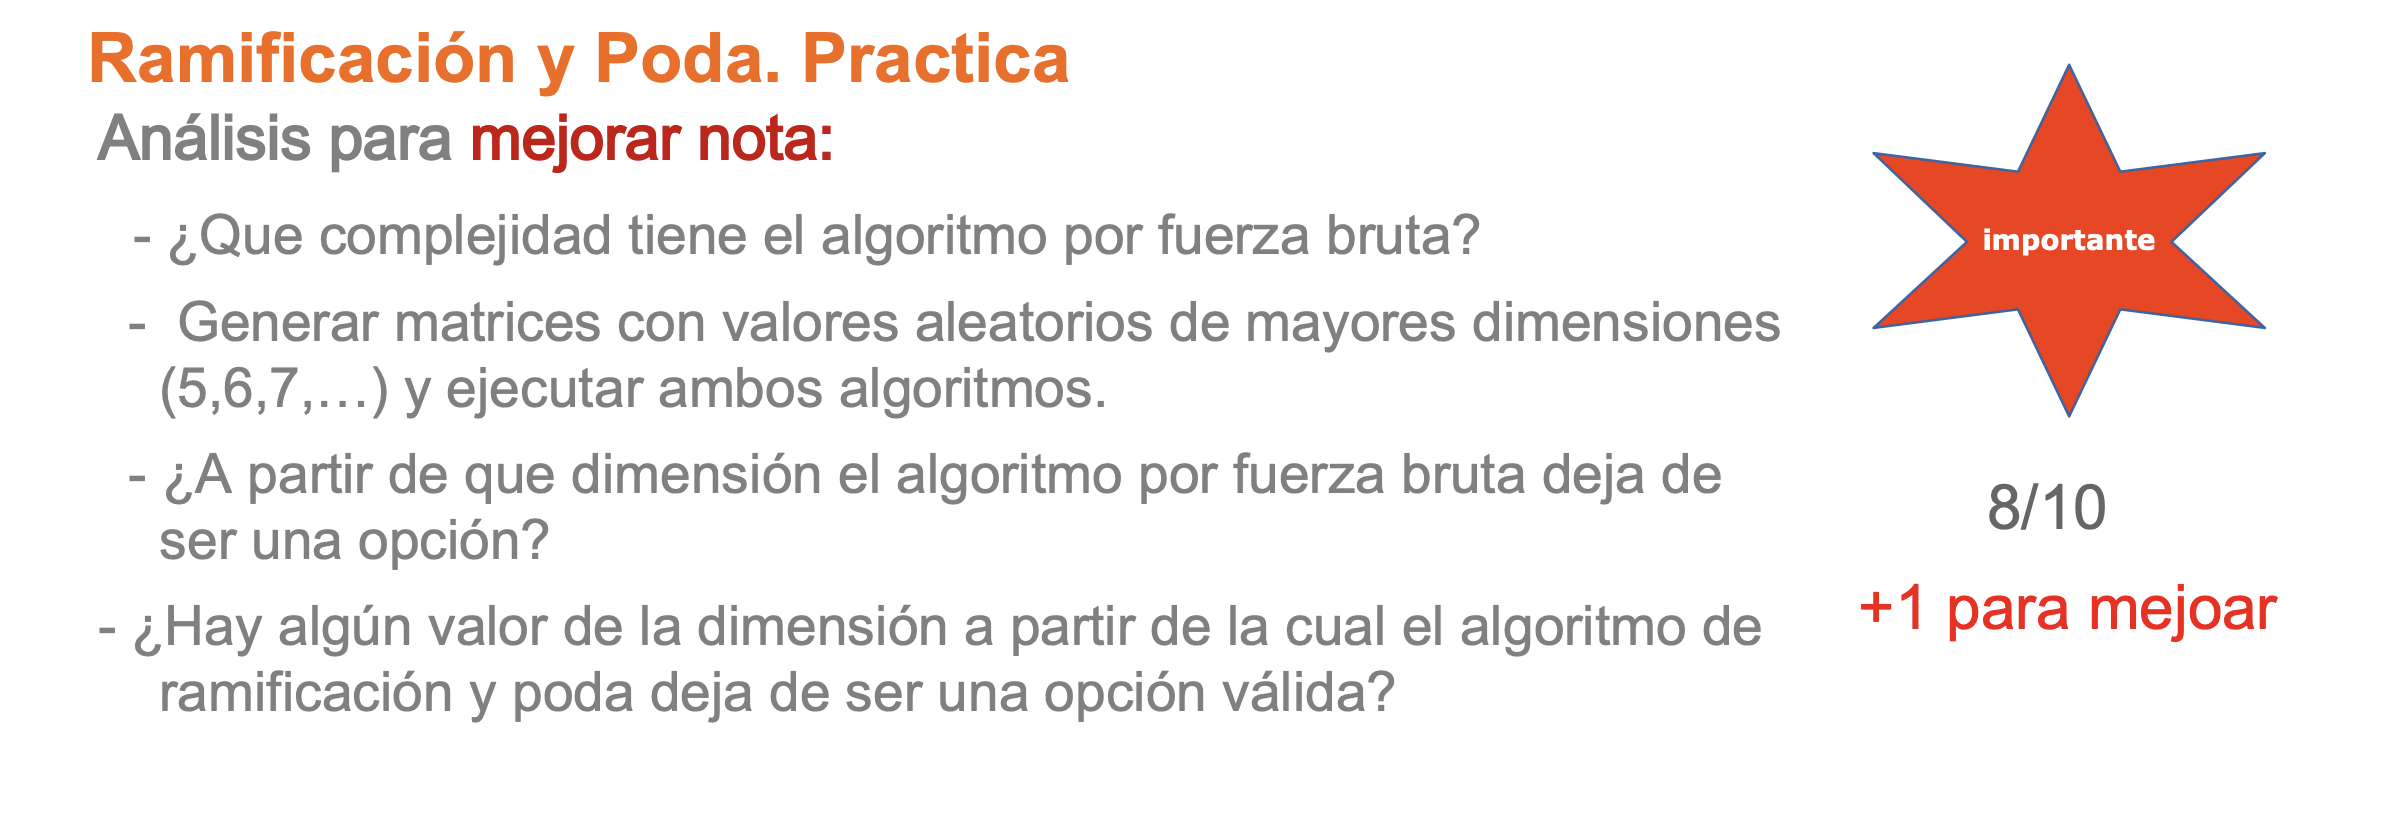

In [16]:
def transformar_permutacion(permutacion, matriz):
    # Crear una lista para almacenar la nueva permutación
    n = len(permutacion)
    nueva_permutacion = [0] * n

    # Invertir la relación: de columna a fila
    for fila, columna in enumerate(permutacion):
        nueva_permutacion[columna] = fila

    return tuple(nueva_permutacion)

def fuerza_bruta(COSTES):
  mejor_valor = float('inf')
  mejor_solucion = ()
  for s in itertools.permutations(range(len(COSTES))):
      valor_tmp = valor(s, COSTES)
      if valor_tmp < mejor_valor:
          mejor_valor = valor_tmp
          mejor_solucion = transformar_permutacion(s, COSTES)
  print("FB La mejor solución es:", mejor_solucion, "con valor:", mejor_valor)
  return mejor_solucion, mejor_valor

fuerza_bruta(COSTES)

FB La mejor solución es: (0, 2, 3, 1) con valor: 61


((0, 2, 3, 1), 61)

#### Complejidad del algoritmo por fuerza bruta: $ O(n!) $
#### Generar matrices con valores aleatorios de mayores dimensiones(5,6,7,…) y ejecutar ambos algoritmos.

In [17]:
def generar_matriz(n):
    return np.random.randint(1, 100, size=(n, n))

# Ejemplo
matriz_5 = generar_matriz(5)
print("Matriz 5x5:\n", matriz_5)
fuerza_bruta(matriz_5)
ramificacion_y_poda(matriz_5)
print()
matriz_6 = generar_matriz(6)
print("Matriz 6x6:\n", matriz_6)
fuerza_bruta(matriz_6)
ramificacion_y_poda(matriz_6)
print()
matriz_7 = generar_matriz(7)
print("Matriz 7x7:\n", matriz_7)
fuerza_bruta(matriz_7)
ramificacion_y_poda(matriz_7)

Matriz 5x5:
 [[81 31 74  2 16]
 [12 83 40 38 71]
 [92 29 16 34 73]
 [66 63 13 86  8]
 [64 32 80 57 82]]
FB La mejor solución es: (3, 0, 2, 4, 1) con valor: 70
La solucion final es: [{'s': (3, 0, 2, 4, 1), 'ci': 70}]  en  42  iteraciones  para dimension:  5

Matriz 6x6:
 [[61 63 76 38 74 60]
 [71 37  7 16 98 86]
 [72 22 95 28 76  2]
 [36 27 24  3  2 10]
 [15 49 30 59 69 13]
 [91 85 88 64 18 91]]
FB La mejor solución es: (3, 2, 5, 1, 0, 4) con valor: 107
La solucion final es: [{'s': (3, 2, 5, 1, 0, 4), 'ci': 107}]  en  315  iteraciones  para dimension:  6

Matriz 7x7:
 [[62 34  5 39 62 94 79]
 [74 82 65 50 18 29 50]
 [97 16  5  1 41 39 60]
 [66 95 40 65 68  3 61]
 [71 10  2 75  8 45 12]
 [18 75 23 39 58 74 11]
 [48 95 17 25 46 55 41]]
FB La mejor solución es: (2, 4, 3, 5, 1, 0, 6) con valor: 96
La solucion final es: [{'s': (2, 4, 3, 5, 1, 6, 0), 'ci': 96}]  en  107  iteraciones  para dimension:  7


In [22]:
norder = 10
matriz = generar_matriz(norder)
print(f"Matriz {norder}x{norder}:\n", matriz)
fuerza_bruta(matriz)
ramificacion_y_poda(matriz)

Matriz 10x10:
 [[34  1 80 13 53 55 70 77 59  8]
 [50 86 14 77 85 84 76  5 13  3]
 [14 55 75 94 24 64 39 64 31 10]
 [49 23 12 47 33 48 19 38 47 49]
 [56 68 37 20 54 33 82 62 19  7]
 [17 54 72 22  2 66 77 89 74 72]
 [57 92 22 69 76 44 22 66 38 99]
 [79 92 12 21 15  6 80 57 22 30]
 [24 44 75 57 79 66 71 43 95 68]
 [12 72 12 11 60 12 47 69 14 81]]
FB La mejor solución es: (1, 7, 9, 2, 8, 4, 6, 5, 0, 3) con valor: 112


((1, 7, 9, 2, 8, 4, 6, 5, 0, 3), 112)


### ¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?
inviable a partir de $n>10$ o $n>15$, dependiendo del hardware

* Para n=5:
5!=120 combinaciones.

* Para n=10:
10! = 3628800 combinaciones.

* Para n=15:
15! = 1307674368000 combinaciones.

### ¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?
Peor caso $ O(n!)$ y el mejor caso $ O(n^k)$

El algoritmo podría dejar de ser una opción válida cuando $n>10$ e imposible para $n>15$ ya que los nodos generados crecen exponencialmente

##Descenso del gradiente

In [27]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide por le metodo del descenso del gradiente : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [28]:
#Definimos la funcion(f) y el gradiente(df)
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

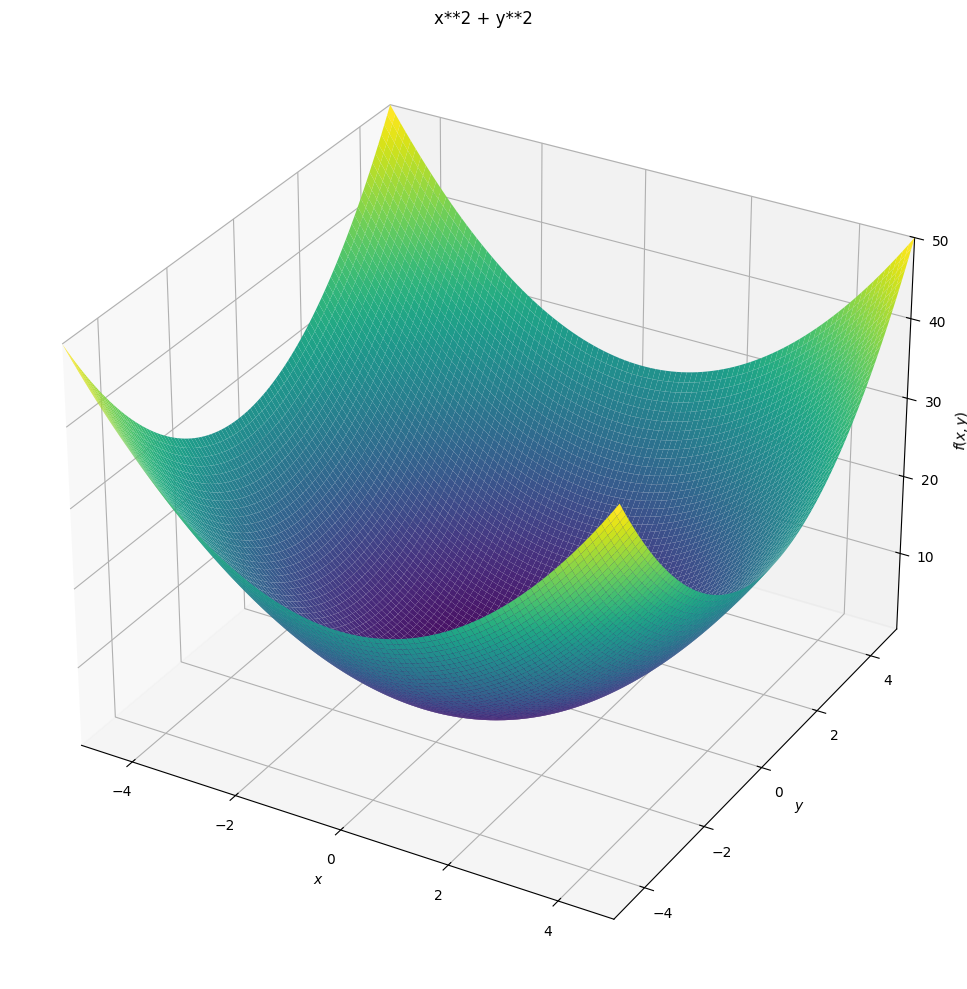

In [29]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

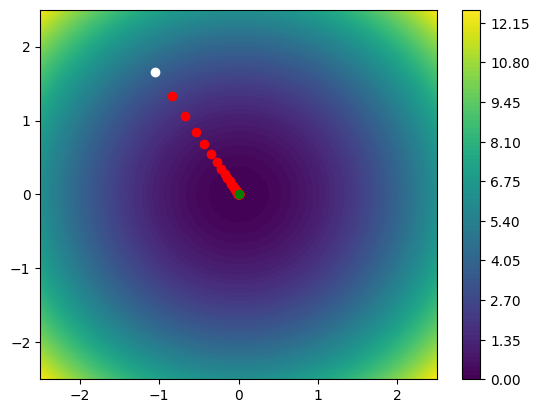

Solucion: [-1.5026029673600272e-05, 2.364702276443673e-05] 7.849632533737049e-10


In [30]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
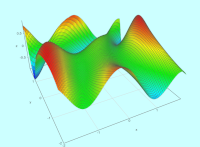


In [1]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [36]:
def df(PUNTO, h = 0.01):
    T = np.copy(PUNTO)
    grad = np.zeros(2)
    for it, th in enumerate(PUNTO):
      T[it] = T[it] + h
      grad[it] = (f(T) - f(PUNTO)) / h
    return grad

X = np.array([1.0, 2.0])  # Punto inicial
gradiente = df(X)
print(f"Gradiente en {X}: {gradiente}")


Gradiente en [1. 2.]: [2.01 6.02]


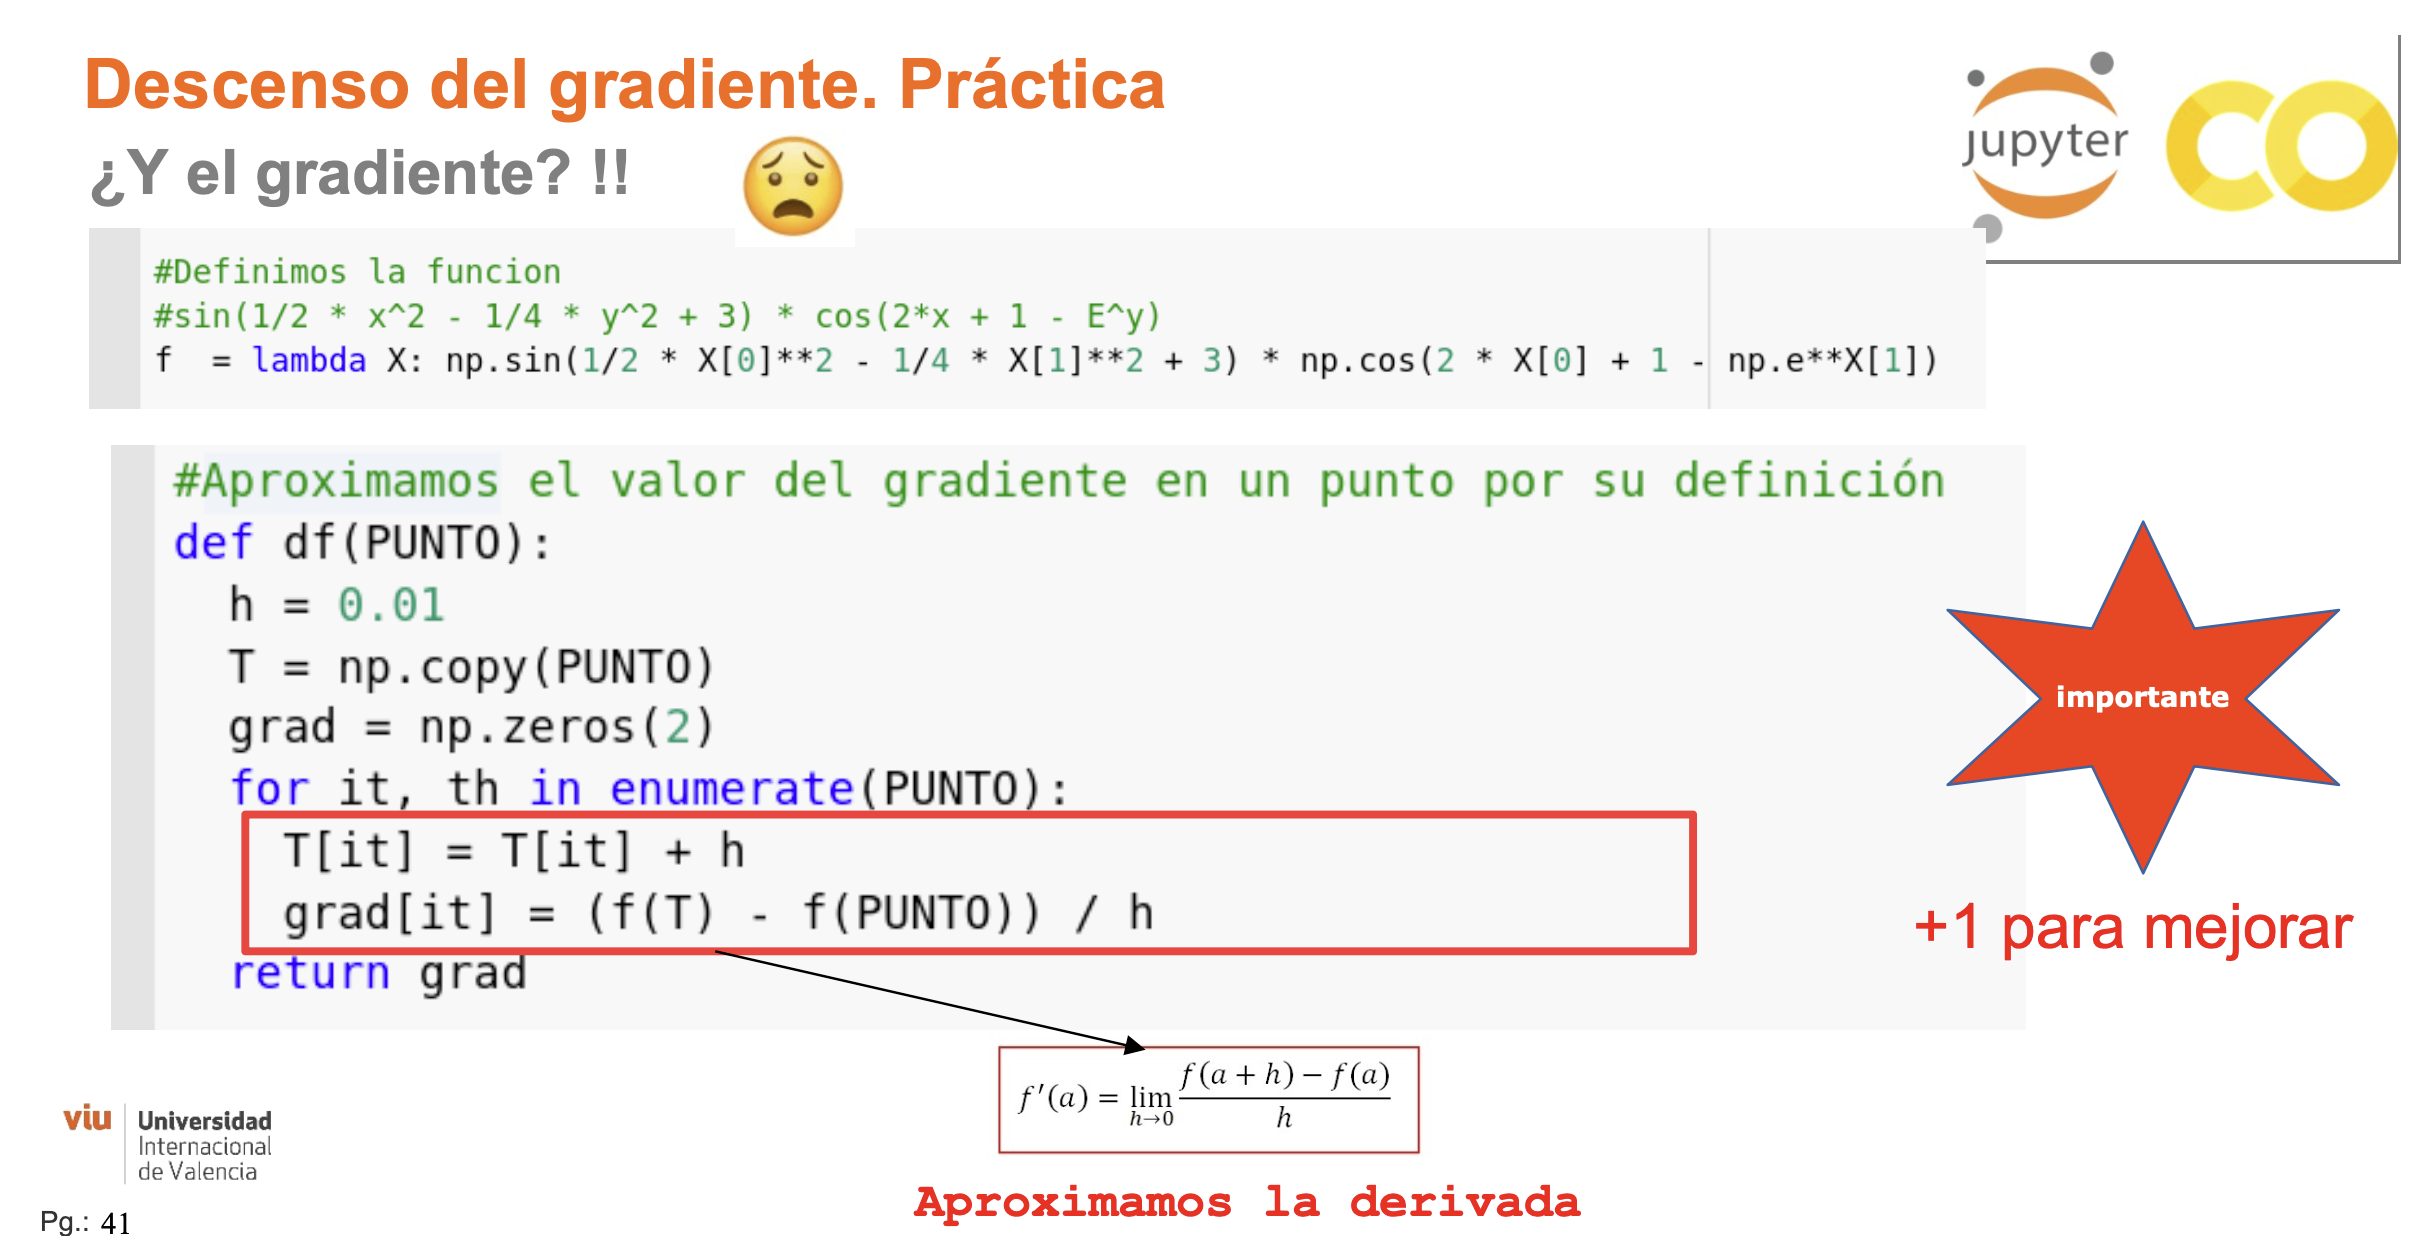